In [1]:
import pandas as pd
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#Pivoting our data

In [3]:
transactions = pd.read_excel("grocery_database.xlsx", sheet_name = "transactions")
product_areas = pd.read_excel("grocery_database.xlsx", sheet_name = "product_areas")

In [4]:
transactions = pd.merge(transactions, product_areas, how = "inner", on = "product_area_id")

In [5]:
transactions.head()

,customer_id,transaction_date,transaction_id,product_area_id,num_items,sales_cost,product_area_name,profit_margin
0,1,2020-04-10,435657533999,3,7,19.16,Fruit,0.14
1,1,2020-07-20,436667313620,3,8,19.99,Fruit,0.14
2,1,2020-07-22,436686191960,3,20,61.69,Fruit,0.14
3,1,2020-08-12,436899350757,3,16,52.28,Fruit,0.14
4,1,2020-08-13,436908803653,3,14,34.58,Fruit,0.14


In [8]:
sales_summary = transactions.groupby(["transaction_date", "product_area_name"])["sales_cost"].sum().reset_index()

In [9]:
sales_summary

,transaction_date,product_area_name,sales_cost
0,2020-04-01,Dairy,1043.14
1,2020-04-01,Fruit,1137.81
2,2020-04-01,Meat,1448.21
3,2020-04-01,Non-Food,4667.76
4,2020-04-01,Vegetables,1306.45
...,...,...,...
910,2020-09-30,Dairy,1064.09
911,2020-09-30,Fruit,1479.63
912,2020-09-30,Meat,2050.98
913,2020-09-30,Non-Food,3825.52


In [12]:
#Pivot table
sales_summary_pivot = transactions.pivot_table(index = "transaction_date", #Think of index as y-axis
                                              columns = "product_area_name", #column we want to pivot - column we want to turn from its own column into columns of pivot table
                                              values = "sales_cost", #column that we use to fill up cells of new pivot table
                                              aggfunc = "sum") #We want to sum 
#By default, aggregated by mean

In [13]:
sales_summary_pivot

product_area_name,Dairy,Fruit,Meat,Non-Food,Vegetables
transaction_date,,,,,
2020-04-01,1043.14,1137.81,1448.21,4667.76,1306.45
2020-04-02,1204.71,1722.27,1684.33,3834.35,758.39
2020-04-03,1122.61,1508.80,1221.80,3861.28,887.49
2020-04-04,1232.02,1946.22,1506.92,5172.59,678.26
2020-04-05,995.28,1367.22,1337.26,4621.97,967.90
...,...,...,...,...,...
2020-09-26,1010.66,1471.05,1830.72,4606.51,741.34
2020-09-27,1248.33,1712.38,1870.55,6190.36,1028.84
2020-09-28,1135.79,1124.51,1458.74,4829.44,749.91


In [14]:
#Compared to groupby, here we can see we have a granular format
#We can plot these trends

<Axes: xlabel='transaction_date'>

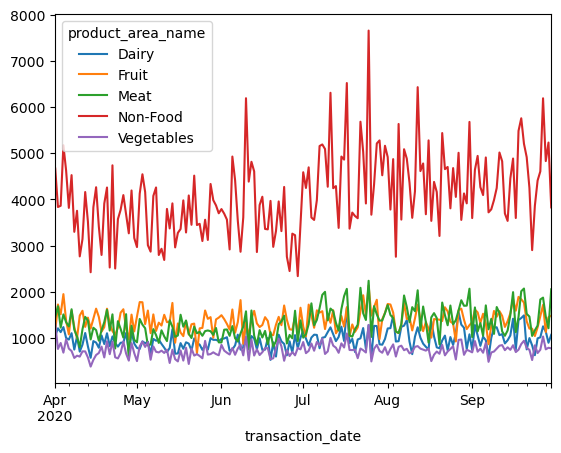

In [15]:
sales_summary_pivot.plot()

In [16]:
#Pivot table
#Add in multiple indexes - pass in multiple columns in index parameter
sales_summary_pivot = transactions.pivot_table(index = ["transaction_date", "profit_margin"], #Think of index as y-axis
                                              columns = "product_area_name", #column we want to pivot - column we want to turn from its own column into columns of pivot table
                                              values = "sales_cost", #column that we use to fill up cells of new pivot table
                                              aggfunc = "sum") #We want to sum 

In [17]:
sales_summary_pivot
#This could be more useful with store_id or region, this may make less sense here

product_area_name                 Dairy    Fruit     Meat  Non-Food  \
transaction_date profit_margin                                        
2020-04-01       0.11               NaN      NaN  1448.21       NaN   
                 0.14               NaN  1137.81      NaN       NaN   
                 0.18               NaN      NaN      NaN       NaN   
                 0.19           1043.14      NaN      NaN       NaN   
                 0.25               NaN      NaN      NaN   4667.76   
...                                 ...      ...      ...       ...   
2020-09-30       0.11               NaN      NaN  2050.98       NaN   
                 0.14               NaN  1479.63      NaN       NaN   
                 0.18               NaN      NaN      NaN       NaN   
                 0.19           1064.09      NaN      NaN       NaN   
                 0.25               NaN      NaN      NaN   3825.52   

product_area_name               Vegetables  
transaction_date profit_margin              
2020-04-01       0.11                  NaN  
                 0.14                  NaN  
                 0.18              1306.45  
                 0.19                  NaN  
                 0.25                  NaN  
...                                    ...  
2020-09-30       0.11                  NaN  
                 0.14                  NaN  
                 0.18               770.43  
                 0.19                  NaN  
                 0.25                  NaN  

[915 rows x 5 columns]

In [18]:
#Fill values
#Fill NaN values
#Add in multiple indexes - pass in multiple columns in index parameter
sales_summary_pivot = transactions.pivot_table(index = ["transaction_date", "profit_margin"], #Think of index as y-axis
                                              columns = "product_area_name", #column we want to pivot - column we want to turn from its own column into columns of pivot table
                                              values = "sales_cost", #column that we use to fill up cells of new pivot table
                                              aggfunc = "sum", #We want to sum 
                                              fill_value=0) #Now we've added a marker for fill_value

In [19]:
sales_summary_pivot

product_area_name                 Dairy    Fruit     Meat  Non-Food  \
transaction_date profit_margin                                        
2020-04-01       0.11              0.00     0.00  1448.21      0.00   
                 0.14              0.00  1137.81     0.00      0.00   
                 0.18              0.00     0.00     0.00      0.00   
                 0.19           1043.14     0.00     0.00      0.00   
                 0.25              0.00     0.00     0.00   4667.76   
...                                 ...      ...      ...       ...   
2020-09-30       0.11              0.00     0.00  2050.98      0.00   
                 0.14              0.00  1479.63     0.00      0.00   
                 0.18              0.00     0.00     0.00      0.00   
                 0.19           1064.09     0.00     0.00      0.00   
                 0.25              0.00     0.00     0.00   3825.52   

product_area_name               Vegetables  
transaction_date profit_margin              
2020-04-01       0.11                 0.00  
                 0.14                 0.00  
                 0.18              1306.45  
                 0.19                 0.00  
                 0.25                 0.00  
...                                    ...  
2020-09-30       0.11                 0.00  
                 0.14                 0.00  
                 0.18               770.43  
                 0.19                 0.00  
                 0.25                 0.00  

[915 rows x 5 columns]

In [20]:
#Margins
#Totals on columns and rows
sales_summary_pivot = transactions.pivot_table(index = ["transaction_date", "profit_margin"], #Think of index as y-axis
                                              columns = "product_area_name", #column we want to pivot - column we want to turn from its own column into columns of pivot table
                                              values = "sales_cost", #column that we use to fill up cells of new pivot table
                                              aggfunc = "sum", #We want to sum 
                                              fill_value=0, #Now we've added a marker for fill_value
                                              margins = True,
                                              margins_name = "Total")

In [21]:
sales_summary_pivot
#Now we have total row and total column

product_area_name                      Dairy      Fruit       Meat   Non-Food  \
transaction_date    profit_margin                                               
2020-04-01 00:00:00 0.11                0.00       0.00    1448.21       0.00   
                    0.14                0.00    1137.81       0.00       0.00   
                    0.18                0.00       0.00       0.00       0.00   
                    0.19             1043.14       0.00       0.00       0.00   
                    0.25                0.00       0.00       0.00    4667.76   
...                                      ...        ...        ...        ...   
2020-09-30 00:00:00 0.14                0.00    1479.63       0.00       0.00   
                    0.18                0.00       0.00       0.00       0.00   
                    0.19             1064.09       0.00       0.00       0.00   
                    0.25                0.00       0.00       0.00    3825.52   
Total                              175792.77  252033.53  240892.82  747129.45   

product_area_name                  Vegetables       Total  
transaction_date    profit_margin                          
2020-04-01 00:00:00 0.11                 0.00     1448.21  
                    0.14                 0.00     1137.81  
                    0.18              1306.45     1306.45  
                    0.19                 0.00     1043.14  
                    0.25                 0.00     4667.76  
...                                       ...         ...  
2020-09-30 00:00:00 0.14                 0.00     1479.63  
                    0.18               770.43      770.43  
                    0.19                 0.00     1064.09  
                    0.25                 0.00     3825.52  
Total                               133879.25  1549727.82  

[916 rows x 6 columns]